## Table of contents:

### 1 Importing Data and libraries
### 2 Clean Data
### 3 Elbow Technique
### 4 k-means Algorithm
    Scatterplots
    Conclusions
### 5 Descriptive statistics
    Conclusions
    What could these results be useful for?

# 6.5 Unsupervised Machine learning

In [1]:
# 1 Import Data and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\turne\Chocolate Rating'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, 'Clean Data','Chocolate_clean.csv'), index_col = False)

In [5]:
## 2 Clean data
df.isna().sum()

Unnamed: 0          0
Company Name        0
Bar Name            0
REF                 0
Review Date         0
Cacao Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         0
dtype: int64

In [6]:
## Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [7]:
## Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Company Name', 'Bar Name', 'REF', 'Review Date', 'Company Location', 'Bean Type', 'Bean Origin'])

In [8]:
df

,Cacao Percent,Rating
0,0.63,3.75
1,0.70,2.75
2,0.70,3.00
3,0.70,3.50
4,0.70,3.50
...,...,...
1790,0.70,3.75
1791,0.65,3.00
1792,0.65,3.50
1793,0.62,3.25


In [9]:
# Create a subset which contains only the 'Rating' and indicators

sub = df[['Rating', 'Cacao Percent']]

# 3 Elbow Technique

In [10]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-417.17978696378873,
 -148.96464087222128,
 -87.796617241442,
 -55.74011440256311,
 -36.06754565865161,
 -26.037948001643326,
 -19.279561999626964,
 -14.341148541869682,
 -10.410590190671948]

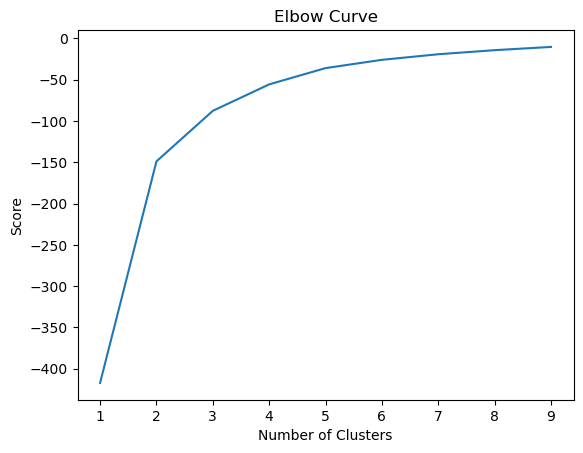

In [12]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The elbow (the breaking point of the curve) is where the curve begins to flatten. In this case, we can see that it jumps from one to two and then again to 3 on the X-axis and continues to slowly increases slightly after five. I believe the optimal number of clusters is five.  I'll test this theory to determine if five clusters are too much or adequate. 

# 4 k-means Algorithm

In [14]:
# Create the k-means object with 5 clusters

kmeans = KMeans(n_clusters = 5)

In [15]:
# Fit the k-means object to the data

kmeans.fit(sub)

C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [16]:
# 5 Perform clustering using the k-means model and assign the results to new 'clusters' column

sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\turne\AppData\Local\Temp\ipykernel_10468\1587882893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [17]:
sub.head()

,Rating,Cacao Percent,clusters
0,3.75,0.63,1
1,2.75,0.70,2
2,3.00,0.70,0
3,3.50,0.70,4
4,3.50,0.70,4


In [18]:
# Check the frequency of each unique value in the 'clusters' column

sub['clusters'].value_counts()

clusters
0    644
4    392
2    386
1    310
3     63
Name: count, dtype: int64

## Scatterplots

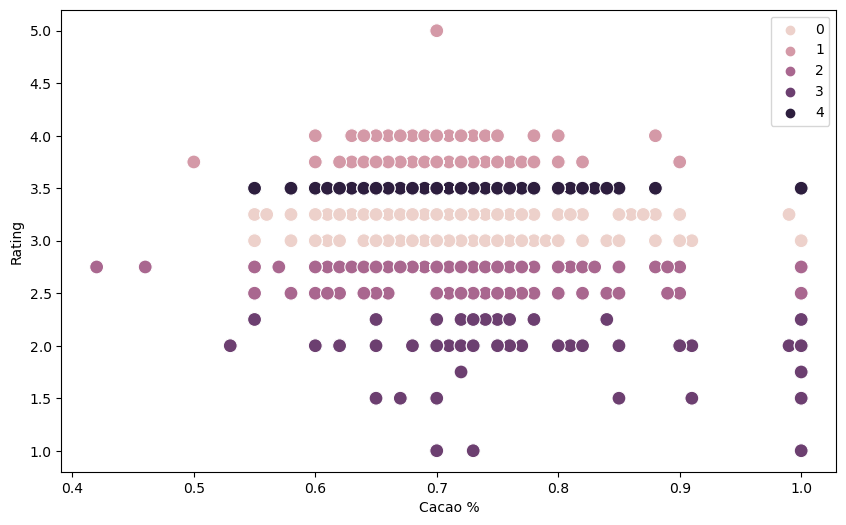

In [20]:
# Plot the clusters for the "Rating" and "Cacao Percent" variables

plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = sub['Cacao Percent'], y = sub['Rating'], hue = kmeans.labels_, s = 100)

ax.grid(False)
plt.xlabel('Cacao %')
plt.ylabel('Rating')
plt.show()

## Evaluation and Insights - The dark purple cluster (cluster #4) represents one of the most common ratings for Cacao Percentages: a 3 out of 5.  In fact, cluster #0 was the biggest with 644 counts within the 3-3.75 Rating.  Cluster #3 indicates the lowest count of low ratings on chocolate, (63 counts out of 1,795).  

## I like this visualization to indicate the clusters of ratings based on the total count of ratings, along the range of Cacao Percent. Cluster #2 shows the highest Ratings which are also favored in the ideal Cacao Percent, from 60% to 83%.  In my opinion, as someone who loves dark chocolate, this is the range of cacao percent I look for in a chocolate bar.  The rating is NOT just based on the Cacao Percent, but is also rated on flavor, ingredients, the heating process (whether the chocolate melts easily on the tongue, rather than quickly on the fingers) and additional factors that are not covered in this dataset. 

# 5 Descriptive Statistics

In [22]:
sub.loc[sub['clusters'] == 4, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 3, 'cluster'] = 'medium'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'pink'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'faded pink'

In [26]:
sub.groupby('cluster').agg({'Cacao Percent':['mean', 'median'],
'Rating':['mean', 'median'],
'Cacao Percent':['mean', 'median']})

Cacao Percent           Rating       
                    mean median      mean median
cluster                                         
dark            0.711607   0.70  3.500000   3.50
faded pink      0.716056   0.70  3.117624   3.00
medium          0.781111   0.75  1.900794   2.00
pink            0.708323   0.70  3.837097   3.75
purple          0.720570   0.71  2.667746   2.75

## Based on these statistics, the dark cluster is the most consistent with Cacao Percent and Ratings mean and median.  The median for all the other clusters Ratings have a difference of a tenth between the mean and median.  That's not great consistency.  Faded pink and medium had the worst consistency and the most fluctuation making them quite diverse. 

# What could these results be useful for?

## Again the inconsistency and diversity between the Cacao Percent and Ratings are not definitive.  There are other factors to analyze, thus further investigations.  However, the dark cluster has the best consistency, so that could lead to common results:  If chocolate bars have 70% Cacao, then they are likely to be rated at a 3.5.  That chocolate bar is considered the elite, or ideal chocolate bar.  

## On the flip side, if the pink cluster is to indicate that Cacao Percent is also 70%, then the Rating could be equally at 3.5 if not up to 3.8 Rating.  It allows possibility, but is not based on confidence.  

## Lastly, the medium cluster indicates a possibility of 75-78% Cacao, and a Rating between 1.9 and 2, which is relatively close in numbers, but these figures tell me that the higher the Cacao Percent, the lower the Ratings.  If this is indeed true, I would expect Chocolatiers to either avoid making chocolate bars with 75% or higher Cacao, or create a variable that would increase the chances of a higher rating. 

In [27]:
# Export the dataframe to csv file
sub.to_csv(os.path.join(path, 'Clean Data','clusters.csv'))